<a href="https://www.kaggle.com/code/ankitajaiwar/dickey-fuller-python?scriptVersionId=116465775" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

Dickey Fuller Test is a statistical test used to determine stationary/non stationary behavior of a time series.

If the obtained p value is less than 0.05 ( pre determined), time series is stationary( rejecting null hypothesis) otherwise it is non stationary ( fail to reject null hypothesis)
.

**Creating a Stationary Time Series**

In [2]:

lags = 1
rho = 0.05
series = [np.random.normal()]
for i in range(500):
        
        prev_vals = series[-lags:][::-1]
        
        #get new value of time series
        add_time_point = np.sum(np.array(prev_vals) * rho) + np.random.normal()
        
        series.append(add_time_point)

**Plottin our time Series**

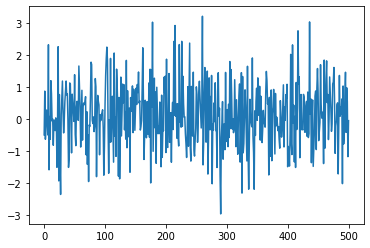

In [3]:
plt.plot(series)

In [4]:
test = adfuller(series)
p_value = test[1]
p_value

0.0

Since p value < 0.05. the time series is stationary.

**Creating a Non Stationary series**

In [5]:
lags = 1
rho = 1 # Coefficient changed to 1 to make the time series non stationary
series_n = [np.random.normal()]
for _ in range(500):
       
        prev_vals = series_n[-lags:][::-1]
        
        #get new value of time series
        add_time_point = np.random.normal()+ np.sum(np.array(prev_vals) * rho) 
        
        series_n.append(add_time_point)

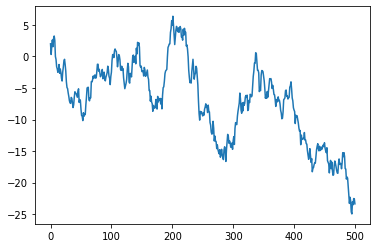

In [6]:
plt.plot(series_n)

In [7]:
test = adfuller(series_n)
p_value = test[1]
p_value

0.7298451725875011

p value > 0.05, hence non stationary

Other tests: 

Other similar test: Kwiatkowski-Phillips-Schmidt-Shin (“KPSS”)
Will upload a notebook on this test soon